In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [3]:
df = pd.read_csv("C:/Users/HP/Downloads/delivery_time.csv")
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


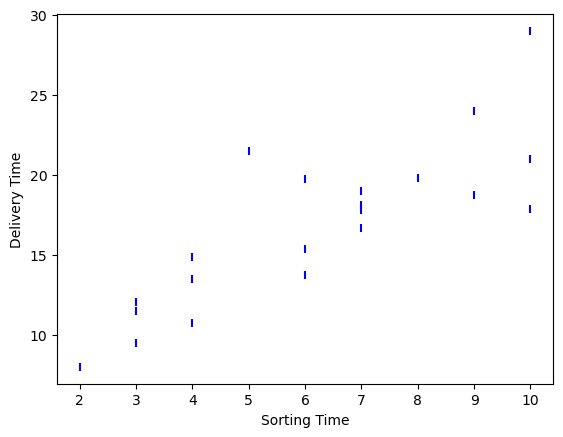

In [4]:
plt.scatter(df["Sorting Time"],df["Delivery Time"],color="blue",marker="|")
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")
plt.show()

<Axes: >

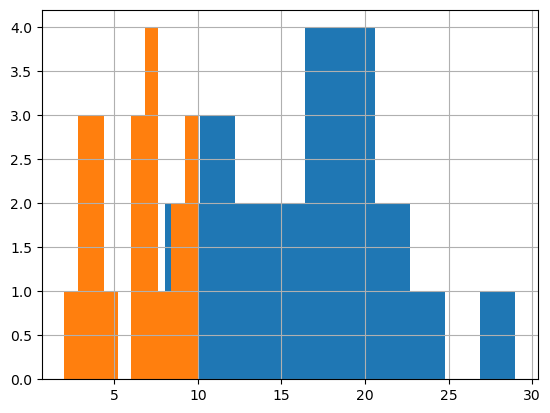

In [5]:
df["Delivery Time"].hist()
df["Sorting Time"].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x1df262bec10>,
 'caps': [<matplotlib.lines.Line2D at 0x1df262d0490>,
 'boxes': [<matplotlib.lines.Line2D at 0x1df262b5250>],
 'medians': [<matplotlib.lines.Line2D at 0x1df262d1ad0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1df262d2510>],
 'means': []}

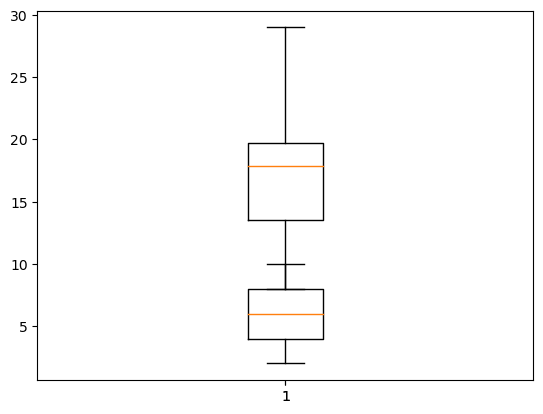

In [7]:
plt.boxplot(df["Delivery Time"])
plt.boxplot(df["Sorting Time"])

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


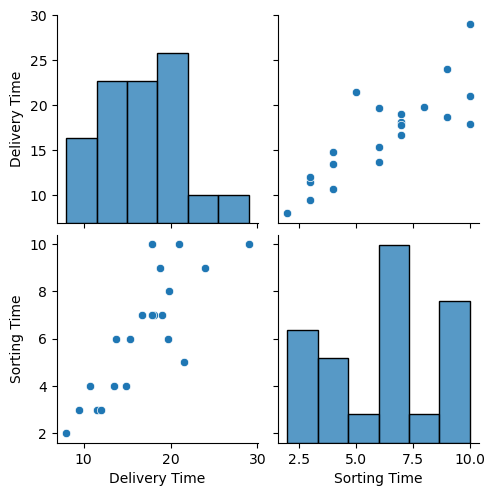

In [8]:
sns.pairplot(df)

In [9]:
x=df["Delivery Time"]
x

0     21.00
1     13.50
2     19.75
3     24.00
4     29.00
5     15.35
6     19.00
7      9.50
8     17.90
9     18.75
10    19.83
11    10.75
12    16.68
13    11.50
14    12.03
15    14.88
16    13.75
17    18.11
18     8.00
19    17.83
20    21.50
Name: Delivery Time, dtype: float64

In [10]:
y=df[["Sorting Time"]]
y

,Sorting Time
0,10
1,4
2,6
3,9
4,10
5,6
6,7
7,3
8,10
9,9


In [11]:
y_train,y_test,x_train,x_test=train_test_split(y,x,test_size=0.30,random_state=10)
le=LinearRegression()
le.fit(y_train, x_train)

LinearRegression()

In [12]:
x_pred=le.predict(y_test)
x_pred

array([13.03495468, 16.89353474, 16.89353474, 14.32114804, 13.03495468,
       11.74876133, 20.7521148 ])

In [13]:
mse=mean_squared_error(x_test,x_pred)
mse

8.771828548610236

In [14]:
r2=r2_score(x_test,x_pred)
r2

0.7009210773239616

In [15]:
print("mean squared error:",mse)
print("R2 score:",r2)

mean squared error: 8.771828548610236
R2 score: 0.7009210773239616


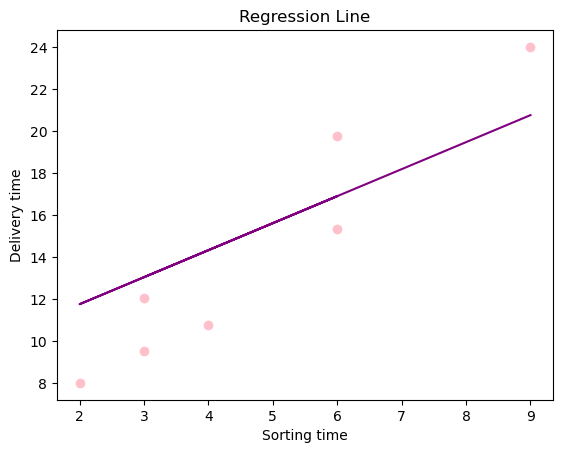

In [19]:
plt.scatter(y_test,x_test, color='pink')
plt.plot(y_test,x_pred, color='purple')
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")
plt.title("Regression Line")
plt.show()

In [20]:
sorting_time = np.array([[5]])
delivery_time_prediction = le.predict(sorting_time)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [21]:
print("Delivery time prediction:", delivery_time_prediction[0])

Delivery time prediction: 15.607341389728095


In [22]:
y_sqrt_train, y_sqrt_test = np.sqrt(y_train), np.sqrt(y_test)
le.fit(y_sqrt_train, x_train)
x_pred_sqrt = le.predict(y_sqrt_test)
mse_sqrt = mean_squared_error(x_test, x_pred_sqrt)
r2_sqrt = r2_score(x_test, x_pred_sqrt)

In [23]:
print("\nModel with Square Root Transformation:")
print("Mean Squared Error:", mse_sqrt)
print("R2 Score:", r2_sqrt)


Model with Square Root Transformation:
Mean Squared Error: 6.897030390921728
R2 Score: 0.7648430532414385


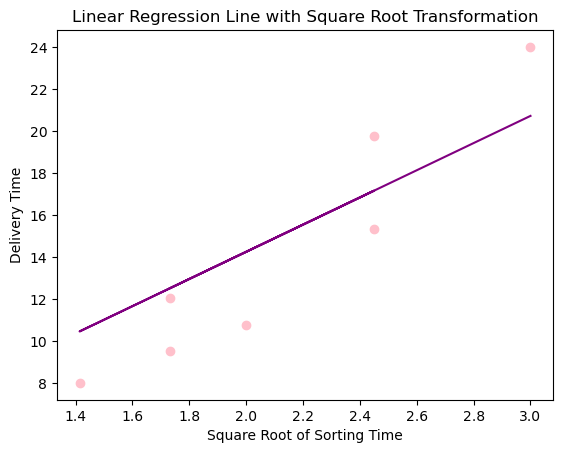

In [24]:
plt.scatter(y_sqrt_test, x_test, color="pink")
plt.plot(y_sqrt_test, x_pred_sqrt, color="purple")
plt.xlabel("Square Root of Sorting Time")
plt.ylabel("Delivery Time")
plt.title("Linear Regression Line with Square Root Transformation")
plt.show()

In [25]:
y_log_train,y_log_test = np.log1p(y_train), np.log1p(y_test)
le.fit(y_log_train, x_train)
x_pred_log = le.predict(y_log_test)
mse_log = mean_squared_error(x_test, x_pred_log)
r2_log = r2_score(x_test,x_pred_log)

In [26]:
print("\nModel with Logarithmic Transformation:")
print("Mean Squared Error:", mse_log)
print("R2 Score:", r2_log)


Model with Logarithmic Transformation:
Mean Squared Error: 6.0455695686642485
R2 Score: 0.7938739427544315


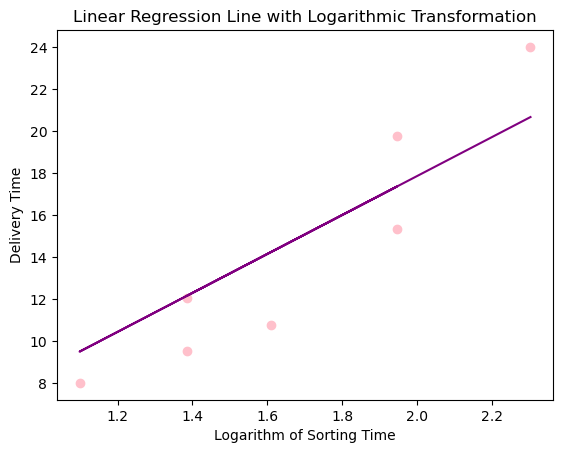

In [27]:
plt.scatter(y_log_test, x_test, color="pink")
plt.plot(y_log_test, x_pred_log, color="purple")
plt.xlabel("Logarithm of Sorting Time")
plt.ylabel("Delivery Time")
plt.title("Linear Regression Line with Logarithmic Transformation")
plt.show()

In [28]:
y_poly_train, y_poly_test = y_train**2, y_test**2
le.fit(y_poly_train, x_train)
x_pred_poly = le.predict(y_poly_test)
mse_poly = mean_squared_error(x_test, x_pred_poly)
r2_poly = r2_score(x_test, x_pred_poly)

In [29]:
print("\nModel with Polynomial Transformation:")
print("Mean Squared Error:", mse_poly)
print("R2 Score:", r2_poly)



Model with Polynomial Transformation:
Mean Squared Error: 13.262361903676512
R2 Score: 0.5478145875389075


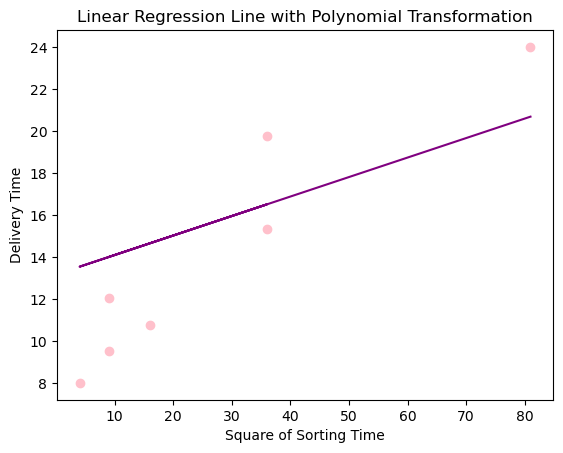

In [31]:
plt.scatter(y_poly_test,x_test, color="pink")
plt.plot(y_poly_test,x_pred_poly, color="purple")
plt.xlabel("Square of Sorting Time")
plt.ylabel("Delivery Time")
plt.title("Linear Regression Line with Polynomial Transformation")
plt.show()